Project-1 : Supervised Learning

Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat
Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt
Assignment Expectations/Steps.

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


import seaborn as sns
%matplotlib inline 

1.Import and store the data in a data frame. (2.5 points)

In [3]:
col_names = ['CityFrom', 'CityTo', 'AvgFare', 'Distance', 'AvgWklyPsngrs', 'MktLdrAirline' , 'MktLdrMktshare', 'MktLdrAvgFare', 'LowCstAirline', 'LowCstMktShare', 'LowCstPrice']
airq = pd.read_csv("airq402.dat", sep='\s+', names=col_names)

In [4]:
airq.head(5)

,CityFrom,CityTo,AvgFare,Distance,AvgWklyPsngrs,MktLdrAirline,MktLdrMktshare,MktLdrAvgFare,LowCstAirline,LowCstMktShare,LowCstPrice
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [5]:
airq.shape

(1000, 11)

In [6]:
airq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
CityFrom          1000 non-null object
CityTo            1000 non-null object
AvgFare           1000 non-null float64
Distance          1000 non-null int64
AvgWklyPsngrs     1000 non-null float64
MktLdrAirline     1000 non-null object
MktLdrMktshare    1000 non-null float64
MktLdrAvgFare     1000 non-null float64
LowCstAirline     1000 non-null object
LowCstMktShare    1000 non-null float64
LowCstPrice       1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [7]:
airq.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AvgFare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
AvgWklyPsngrs,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
MktLdrMktshare,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
MktLdrAvgFare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
LowCstMktShare,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
LowCstPrice,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [8]:
## Checking for null values
airq.isnull().sum()

CityFrom          0
CityTo            0
AvgFare           0
Distance          0
AvgWklyPsngrs     0
MktLdrAirline     0
MktLdrMktshare    0
MktLdrAvgFare     0
LowCstAirline     0
LowCstMktShare    0
LowCstPrice       0
dtype: int64

In [9]:
## dropping the CityFrom, CityTo, MktLdrAirline, LowCstAirline as they are the names of City From, City To, 
## Market Leader Airline Name, and Lowcost Airline Name, and are useless for the model.
airq = airq.drop(columns=['CityFrom','CityTo', 'MktLdrAirline','LowCstAirline'] , axis=1)
airq.shape

(1000, 7)

2.Remove the outliers from the data (5 points)

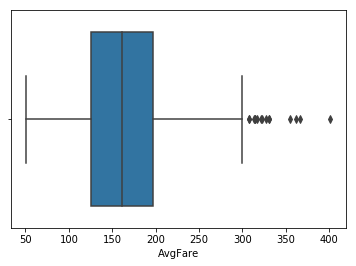

In [10]:
## Visually checking for outliars
sns.boxplot(airq['AvgFare'])


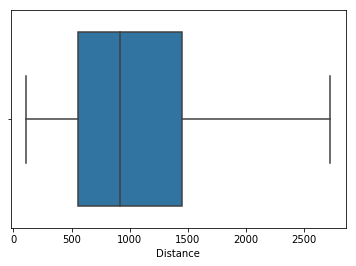

In [11]:
## Visually checking for outliars
sns.boxplot(airq['Distance'])

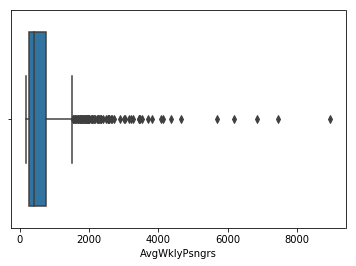

In [12]:
## Visually checking for outliars
sns.boxplot(airq['AvgWklyPsngrs'])

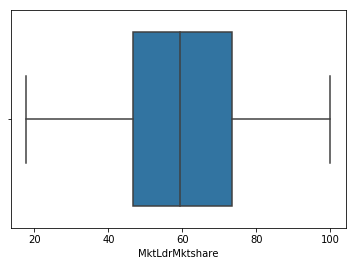

In [13]:
## Visually checking for outliars
sns.boxplot(airq['MktLdrMktshare'])

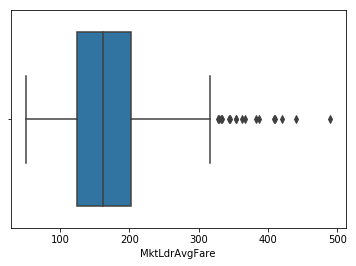

In [14]:
## Visually checking for outliars
sns.boxplot(airq['MktLdrAvgFare'])

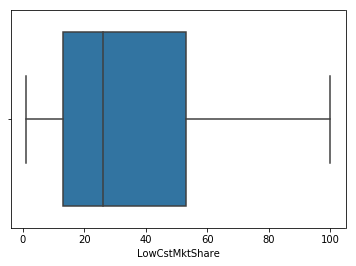

In [15]:
## Visually checking for outliars
sns.boxplot(airq['LowCstMktShare'])


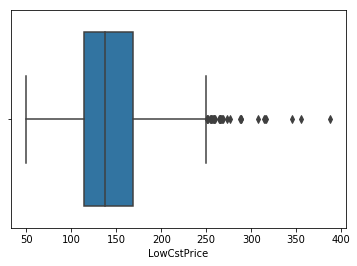

In [16]:
## Visually checking for outliars
sns.boxplot(airq['LowCstPrice'])

In [17]:
q1 = airq.quantile(0.25)
q3 = airq.quantile(0.75)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

AvgFare            71.4175
Distance          899.0000
AvgWklyPsngrs     512.7150
MktLdrMktshare     27.0000
MktLdrAvgFare      78.8925
LowCstMktShare     39.7775
LowCstPrice        54.7625
dtype: float64


In [18]:
## Removing outliars
airq = airq[~((airq < lower_bound)|(airq > upper_bound)).any(axis=1)]
airq.shape

(885, 7)

3.Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)


In [19]:
Y = airq['AvgFare'] # Dependent Variable
X = airq.drop(columns=['AvgFare'], axis =1) # Independent Variables

4.Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)


In [20]:
corr = airq.corr()
corr

,AvgFare,Distance,AvgWklyPsngrs,MktLdrMktshare,MktLdrAvgFare,LowCstMktShare,LowCstPrice
AvgFare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
AvgWklyPsngrs,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
MktLdrMktshare,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
MktLdrAvgFare,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
LowCstMktShare,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
LowCstPrice,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


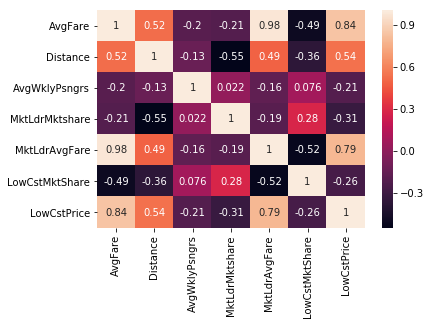

In [21]:
sns.heatmap(airq.corr(), annot=True)

In [22]:
airq = airq.drop(columns=['AvgWklyPsngrs','MktLdrMktshare', 'LowCstMktShare'] , axis=1)
airq.shape

(885, 4)

5.Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)


In [23]:
sns.pairplot(airq, hue='AvgFare')

6.Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)


In [24]:
Y = airq['AvgFare'] # Dependent Variable
X = airq.drop(columns=['AvgFare'], axis =1) # Independent Variables

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

regression_model = LinearRegression()

regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

7.Print the coefficients & intercepts of the linear regression model (5 points)


In [25]:
##for idx, col_name in enumerate(X_train.columns):
##    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
for col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0]))

The coefficient for (0, 'Distance') is 0.0018191079054600504
The coefficient for (1, 'MktLdrAvgFare') is 0.0018191079054600504
The coefficient for (2, 'LowCstPrice') is 0.0018191079054600504


In [26]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5.634377449869845


8.Print the accuracy of the overall model (2.5 points)

In [27]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, Y_test)

0.9736474749127885

In [28]:
mse = np.mean((regression_model.predict(X_test)-Y_test)**2)
mse

63.73010293817477

In [29]:
math.sqrt(mse)

7.983113611754174

In [30]:
Y_pred = regression_model.predict(X_test)

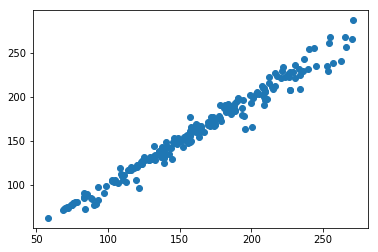

In [31]:
plt.scatter(Y_test, Y_pred)

ITERATION #2

In [32]:
airq_scaled = preprocessing.scale(airq)

airq_scaled

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


array([[-0.94592578, -0.83168393, -0.96810169, -0.73821466],
       [-0.78077815, -0.29173826, -0.74165636, -0.53960701],
       [ 1.11738752, -0.304749  ,  1.15271093,  0.67011692],
       ...,
       [-0.00664859, -0.36655001, -0.05518527,  0.46673867],
       [-1.79024309, -1.40740913, -1.67391263, -1.68204037],
       [-0.69407564, -0.2933646 , -0.61341244, -0.46428174]])

In [33]:
#convert the numpy array back into a dataframe 

airq_scaled = pd.DataFrame(airq_scaled, columns=airq.columns)

airq_scaled

,AvgFare,Distance,MktLdrAvgFare,LowCstPrice
0,-0.945926,-0.831684,-0.968102,-0.738215
1,-0.780778,-0.291738,-0.741656,-0.539607
2,1.117388,-0.304749,1.152711,0.670117
3,-1.876326,-1.222006,-1.759909,-1.797037
4,-0.044633,-0.514547,-0.023077,0.125264
5,-0.518606,0.267724,-0.462261,-0.319908
6,-0.153630,1.947735,-0.262854,0.204858
7,0.628344,2.321794,0.797458,0.842863
8,-0.638751,0.054673,-0.655284,-0.319908
9,-0.539250,0.147374,-0.557271,-0.392974


In [34]:
Y = airq_scaled['AvgFare'] # Dependent Variable
X = airq_scaled.drop(columns=['AvgFare'], axis =1) # Independent Variables

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

regression_model = LinearRegression()

regression_model.fit(X_train, Y_train)

for col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0]))
    
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The coefficient for (0, 'Distance') is 0.02309026211318609
The coefficient for (1, 'MktLdrAvgFare') is 0.02309026211318609
The coefficient for (2, 'LowCstPrice') is 0.02309026211318609
The intercept for our model is -0.00638629478300521


In [35]:
regression_model.score(X_test, Y_test)


0.9736474749127885

In [36]:
mse = np.mean((regression_model.predict(X_test)-Y_test)**2)
mse

0.027158725196610514

In [37]:
math.sqrt(mse)

0.16479904488986127

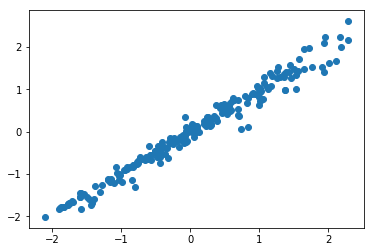

In [38]:
Y_pred = regression_model.predict(X_test)
plt.scatter(Y_test, Y_pred)